# Problem Statement:

Organizations often struggle to identify whether candidates are a good fit for AI-related roles due to missing skills, 
insufficient experience, or lack of relevant training.
Manually evaluating every candidate is time-consuming and error-prone.# 

# Importing Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter

In [4]:
df = pd.read_csv("AI_Skill_Gap_Dataset_20000.csv")
df.head()

,Candidate_ID,Years_of_Experience,Education_Level,Skills_List,Certifications,Soft_Skills_List,Job_Role,Required_Skills,Skill_Gap_Count,Fit_Score,Department,Years_in_Current_Job,Past_Projects_Count,Average_Project_Rating,Training_Attended,Location,Fit_Label
0,C00001,3,High School,"Tableau, Power BI, NLP, Excel, SQL, Leadership...",NaN,Communication,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,17,2.7,3,Hyderabad,0
1,C00002,8,High School,"NLP, Deep Learning, Machine Learning, Tableau",PMP,"Communication, Time Management",Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,14,3.1,3,Bangalore,0
2,C00003,9,Master's,"Power BI, NLP, SQL, Python, Statistics, Tablea...",AWS,"Teamwork, Creativity",HR Analyst,"Machine Learning, Statistics, Power BI, Tableau",1,75,IT,9,20,1.7,5,Delhi,1
3,C00004,5,PhD,"Tableau, AWS, Leadership, Power BI, Machine Le...",AWS,"Creativity, Teamwork",Data Analyst,"Project Management, NLP, Machine Learning, Pow...",2,50,Marketing,6,20,2.8,2,Delhi,0
4,C00005,7,Master's,"Project Management, Deep Learning, Statistics,...","AWS, Tableau, Python",Leadership,Marketing Analyst,"Deep Learning, Statistics, Project Management",0,100,Marketing,8,8,4.9,0,Bangalore,1


# Understanding Data

In [6]:
# checking rows and columns size
print(df.shape)

(20000, 17)


In [7]:
# checking data types of all columns
print(df.dtypes)

Candidate_ID               object
Years_of_Experience         int64
Education_Level            object
Skills_List                object
Certifications             object
Soft_Skills_List           object
Job_Role                   object
Required_Skills            object
Skill_Gap_Count             int64
Fit_Score                   int64
Department                 object
Years_in_Current_Job        int64
Past_Projects_Count         int64
Average_Project_Rating    float64
Training_Attended           int64
Location                   object
Fit_Label                   int64
dtype: object


In [8]:
# checking null values
print(df.isnull().sum())

Candidate_ID                 0
Years_of_Experience          0
Education_Level              0
Skills_List                  0
Certifications            4999
Soft_Skills_List             0
Job_Role                     0
Required_Skills              0
Skill_Gap_Count              0
Fit_Score                    0
Department                   0
Years_in_Current_Job         0
Past_Projects_Count          0
Average_Project_Rating       0
Training_Attended            0
Location                     0
Fit_Label                    0
dtype: int64


In [9]:
df.head()

,Candidate_ID,Years_of_Experience,Education_Level,Skills_List,Certifications,Soft_Skills_List,Job_Role,Required_Skills,Skill_Gap_Count,Fit_Score,Department,Years_in_Current_Job,Past_Projects_Count,Average_Project_Rating,Training_Attended,Location,Fit_Label
0,C00001,3,High School,"Tableau, Power BI, NLP, Excel, SQL, Leadership...",NaN,Communication,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,17,2.7,3,Hyderabad,0
1,C00002,8,High School,"NLP, Deep Learning, Machine Learning, Tableau",PMP,"Communication, Time Management",Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,14,3.1,3,Bangalore,0
2,C00003,9,Master's,"Power BI, NLP, SQL, Python, Statistics, Tablea...",AWS,"Teamwork, Creativity",HR Analyst,"Machine Learning, Statistics, Power BI, Tableau",1,75,IT,9,20,1.7,5,Delhi,1
3,C00004,5,PhD,"Tableau, AWS, Leadership, Power BI, Machine Le...",AWS,"Creativity, Teamwork",Data Analyst,"Project Management, NLP, Machine Learning, Pow...",2,50,Marketing,6,20,2.8,2,Delhi,0
4,C00005,7,Master's,"Project Management, Deep Learning, Statistics,...","AWS, Tableau, Python",Leadership,Marketing Analyst,"Deep Learning, Statistics, Project Management",0,100,Marketing,8,8,4.9,0,Bangalore,1


In [10]:
# Basic statistics for numeric columns
print( df.describe())

       Years_of_Experience  Skill_Gap_Count     Fit_Score  \
count         20000.000000      20000.00000  20000.000000   
mean              7.403550          2.61060     41.919650   
std               4.613324          1.22141     23.787032   
min               0.000000          0.00000      0.000000   
25%               3.000000          2.00000     25.000000   
50%               7.000000          3.00000     40.000000   
75%              11.000000          3.00000     60.000000   
max              15.000000          6.00000    100.000000   

       Years_in_Current_Job  Past_Projects_Count  Average_Project_Rating  \
count          20000.000000         20000.000000            20000.000000   
mean               5.047050            10.011850                3.010580   
std                3.167876             6.040905                1.160736   
min                0.000000             0.000000                1.000000   
25%                2.000000             5.000000                2.0000

In [11]:
#We dropped Candidate_ID because it’s just a unique identifier and doesn’t provide any predictive information for the model.
df = df.drop(columns="Candidate_ID")

In [12]:
# Quick distribution overview for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for Education_Level:
 Education_Level
High School    5073
Bachelor's     5029
PhD            4953
Master's       4945
Name: count, dtype: int64

Value counts for Skills_List:
 Skills_List
Machine Learning, Python, Power BI                                                       8
Project Management, Leadership, NLP                                                      7
Excel, AWS, Tableau                                                                      7
Statistics, Project Management, Excel                                                    7
Communication, SQL, Project Management                                                   6
                                                                                        ..
Deep Learning, NLP, Machine Learning, Statistics, Power BI, Excel                        1
SQL, Deep Learning, AWS, Power BI, Project Management, Machine Learning, Tableau, NLP    1
Statistics, Power BI, Machine Learning, Leadership                    

In [13]:
df.head(2)

,Years_of_Experience,Education_Level,Skills_List,Certifications,Soft_Skills_List,Job_Role,Required_Skills,Skill_Gap_Count,Fit_Score,Department,Years_in_Current_Job,Past_Projects_Count,Average_Project_Rating,Training_Attended,Location,Fit_Label
0,3,High School,"Tableau, Power BI, NLP, Excel, SQL, Leadership...",NaN,Communication,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,17,2.7,3,Hyderabad,0
1,8,High School,"NLP, Deep Learning, Machine Learning, Tableau",PMP,"Communication, Time Management",Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,14,3.1,3,Bangalore,0


# Data Pre-Processing

In [15]:
# cleaning null values
df['Certifications'] = df['Certifications'].fillna('')

In [16]:
# Convert to individual certifications
df['Certifications'] = df['Certifications'].str.split(',')

In [17]:
# it removes extra spaces
df['Certifications'] = df['Certifications'].apply(lambda x: [i.strip().lower() for i in x])

In [18]:
# One-hot encoding
mlb = MultiLabelBinarizer()
cert_df = pd.DataFrame(mlb.fit_transform(df['Certifications']),
                       columns=mlb.classes_,
                       index=df.index)

df = pd.concat([df, cert_df], axis=1)
df = df.drop(columns=['Certifications'])

In [19]:
df.head()

,Years_of_Experience,Education_Level,Skills_List,Soft_Skills_List,Job_Role,Required_Skills,Skill_Gap_Count,Fit_Score,Department,Years_in_Current_Job,...,Average_Project_Rating,Training_Attended,Location,Fit_Label,,aws,pmp,power bi,python,tableau
0,3,High School,"Tableau, Power BI, NLP, Excel, SQL, Leadership...",Communication,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,...,2.7,3,Hyderabad,0,1,0,0,0,0,0
1,8,High School,"NLP, Deep Learning, Machine Learning, Tableau","Communication, Time Management",Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,...,3.1,3,Bangalore,0,0,0,1,0,0,0
2,9,Master's,"Power BI, NLP, SQL, Python, Statistics, Tablea...","Teamwork, Creativity",HR Analyst,"Machine Learning, Statistics, Power BI, Tableau",1,75,IT,9,...,1.7,5,Delhi,1,0,1,0,0,0,0
3,5,PhD,"Tableau, AWS, Leadership, Power BI, Machine Le...","Creativity, Teamwork",Data Analyst,"Project Management, NLP, Machine Learning, Pow...",2,50,Marketing,6,...,2.8,2,Delhi,0,0,1,0,0,0,0
4,7,Master's,"Project Management, Deep Learning, Statistics,...",Leadership,Marketing Analyst,"Deep Learning, Statistics, Project Management",0,100,Marketing,8,...,4.9,0,Bangalore,1,0,1,0,0,1,1


In [20]:
# Select all columns from 'Fit_Label' to the last column
subset = df.loc[:, 'Fit_Label':]
print(subset.head())

   Fit_Label     aws  pmp  power bi  python  tableau
0          0  1    0    0         0       0        0
1          0  0    0    1         0       0        0
2          1  0    1    0         0       0        0
3          0  0    1    0         0       0        0
4          1  0    1    0         0       1        1


In [21]:
print(df['Fit_Label'].head())

0    0
1    0
2    1
3    0
4    1
Name: Fit_Label, dtype: int64


In [22]:
print(df.columns.tolist())

['Years_of_Experience', 'Education_Level', 'Skills_List', 'Soft_Skills_List', 'Job_Role', 'Required_Skills', 'Skill_Gap_Count', 'Fit_Score', 'Department', 'Years_in_Current_Job', 'Past_Projects_Count', 'Average_Project_Rating', 'Training_Attended', 'Location', 'Fit_Label', '', 'aws', 'pmp', 'power bi', 'python', 'tableau']


In [23]:
# fixing spaces with under score(_)
df.columns = df.columns.str.replace(' ', '_')
print(df.columns.tolist())

['Years_of_Experience', 'Education_Level', 'Skills_List', 'Soft_Skills_List', 'Job_Role', 'Required_Skills', 'Skill_Gap_Count', 'Fit_Score', 'Department', 'Years_in_Current_Job', 'Past_Projects_Count', 'Average_Project_Rating', 'Training_Attended', 'Location', 'Fit_Label', '', 'aws', 'pmp', 'power_bi', 'python', 'tableau']


In [24]:
df = df.drop(columns=[''])

In [25]:
df.head()

,Years_of_Experience,Education_Level,Skills_List,Soft_Skills_List,Job_Role,Required_Skills,Skill_Gap_Count,Fit_Score,Department,Years_in_Current_Job,Past_Projects_Count,Average_Project_Rating,Training_Attended,Location,Fit_Label,aws,pmp,power_bi,python,tableau
0,3,High School,"Tableau, Power BI, NLP, Excel, SQL, Leadership...",Communication,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,17,2.7,3,Hyderabad,0,0,0,0,0,0
1,8,High School,"NLP, Deep Learning, Machine Learning, Tableau","Communication, Time Management",Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,14,3.1,3,Bangalore,0,0,1,0,0,0
2,9,Master's,"Power BI, NLP, SQL, Python, Statistics, Tablea...","Teamwork, Creativity",HR Analyst,"Machine Learning, Statistics, Power BI, Tableau",1,75,IT,9,20,1.7,5,Delhi,1,1,0,0,0,0
3,5,PhD,"Tableau, AWS, Leadership, Power BI, Machine Le...","Creativity, Teamwork",Data Analyst,"Project Management, NLP, Machine Learning, Pow...",2,50,Marketing,6,20,2.8,2,Delhi,0,1,0,0,0,0
4,7,Master's,"Project Management, Deep Learning, Statistics,...",Leadership,Marketing Analyst,"Deep Learning, Statistics, Project Management",0,100,Marketing,8,8,4.9,0,Bangalore,1,1,0,0,1,1


In [26]:
df.tail()

,Years_of_Experience,Education_Level,Skills_List,Soft_Skills_List,Job_Role,Required_Skills,Skill_Gap_Count,Fit_Score,Department,Years_in_Current_Job,Past_Projects_Count,Average_Project_Rating,Training_Attended,Location,Fit_Label,aws,pmp,power_bi,python,tableau
19995,6,Bachelor's,"Leadership, Statistics, Machine Learning, Comm...","Creativity, Time Management",Data Analyst,"NLP, Power BI, Tableau, Python, Leadership",3,40,IT,9,17,4.2,1,Chennai,0,0,0,0,0,0
19996,6,Master's,"Communication, SQL, Power BI, Machine Learning...","Creativity, Teamwork, Time Management",Marketing Analyst,"Project Management, Python, NLP, Statistics, SQL",1,80,HR,10,19,2.4,0,Chennai,1,0,0,0,1,0
19997,15,Master's,"Power BI, Tableau, Statistics, Excel, Leadersh...",Teamwork,Project Manager,"Project Management, Leadership, AWS, Power BI,...",2,60,Operations,2,2,3.8,4,Hyderabad,0,0,0,0,0,0
19998,14,High School,"Statistics, Tableau, Excel, Python, Deep Learn...","Teamwork, Creativity, Time Management",HR Analyst,"Python, NLP, Excel, AWS",1,75,Marketing,7,17,2.3,3,Bangalore,1,0,0,0,0,0
19999,2,Master's,"NLP, Statistics, Excel, Tableau","Teamwork, Leadership, Time Management",Data Analyst,"Machine Learning, Deep Learning, Leadership",3,0,HR,7,18,3.5,1,Bangalore,0,0,0,1,1,1


In [27]:
# Make all column names lowercase for consistency
df.columns = df.columns.str.lower()
print(df.columns)

Index(['years_of_experience', 'education_level', 'skills_list',
       'soft_skills_list', 'job_role', 'required_skills', 'skill_gap_count',
       'fit_score', 'department', 'years_in_current_job',
       'past_projects_count', 'average_project_rating', 'training_attended',
       'location', 'fit_label', 'aws', 'pmp', 'power_bi', 'python', 'tableau'],
      dtype='object')


In [28]:
df['skills_list'].head()

0    Tableau, Power BI, NLP, Excel, SQL, Leadership...
1        NLP, Deep Learning, Machine Learning, Tableau
2    Power BI, NLP, SQL, Python, Statistics, Tablea...
3    Tableau, AWS, Leadership, Power BI, Machine Le...
4    Project Management, Deep Learning, Statistics,...
Name: skills_list, dtype: object

In [29]:
# splitting skills into list
df['skills_list'] = df['skills_list'].str.split(',')

In [30]:
# removing extra space converting skills to lower case
df['skills_list'] = df['skills_list'].apply(lambda x: [i.strip().upper() for i in x])

In [31]:
# converting skills to numeric or can say one hot encoding

mlb = MultiLabelBinarizer()
skills_df = pd.DataFrame(mlb.fit_transform(df['skills_list']),
                         columns=mlb.classes_,
                         index=df.index)

df = pd.concat([df, skills_df], axis=1)
df = df.drop(columns=['skills_list'])

In [32]:
df.head(2)

,years_of_experience,education_level,soft_skills_list,job_role,required_skills,skill_gap_count,fit_score,department,years_in_current_job,past_projects_count,...,EXCEL,LEADERSHIP,MACHINE LEARNING,NLP,POWER BI,PROJECT MANAGEMENT,PYTHON,SQL,STATISTICS,TABLEAU
0,3,High School,Communication,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,17,...,1,1,0,1,1,0,0,1,1,1
1,8,High School,"Communication, Time Management",Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,14,...,0,0,1,1,0,0,0,0,0,1


In [33]:
pd.set_option('display.max_columns', None)
df.head(2)

,years_of_experience,education_level,soft_skills_list,job_role,required_skills,skill_gap_count,fit_score,department,years_in_current_job,past_projects_count,average_project_rating,training_attended,location,fit_label,aws,pmp,power_bi,python,tableau,AWS,COMMUNICATION,DEEP LEARNING,EXCEL,LEADERSHIP,MACHINE LEARNING,NLP,POWER BI,PROJECT MANAGEMENT,PYTHON,SQL,STATISTICS,TABLEAU
0,3,High School,Communication,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,17,2.7,3,Hyderabad,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1
1,8,High School,"Communication, Time Management",Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,14,3.1,3,Bangalore,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1


In [34]:
df.columns

Index(['years_of_experience', 'education_level', 'soft_skills_list',
       'job_role', 'required_skills', 'skill_gap_count', 'fit_score',
       'department', 'years_in_current_job', 'past_projects_count',
       'average_project_rating', 'training_attended', 'location', 'fit_label',
       'aws', 'pmp', 'power_bi', 'python', 'tableau', 'AWS', 'COMMUNICATION',
       'DEEP LEARNING', 'EXCEL', 'LEADERSHIP', 'MACHINE LEARNING', 'NLP',
       'POWER BI', 'PROJECT MANAGEMENT', 'PYTHON', 'SQL', 'STATISTICS',
       'TABLEAU'],
      dtype='object')

In [35]:
cert_cols = ['aws', 'pmp', 'power_bi', 'python', 'tableau']

# Add prefix
df.rename(columns={c: 'cert_' + c for c in cert_cols}, inplace=True)

In [36]:
skill_cols = ['AWS', 'COMMUNICATION', 'DEEP LEARNING', 'EXCEL', 'LEADERSHIP', 
              'MACHINE LEARNING', 'NLP', 'POWER BI', 'PROJECT MANAGEMENT', 
              'PYTHON', 'SQL', 'STATISTICS', 'TABLEAU']

# Rename with prefix, lowercase, replace spaces with underscores
df.rename(columns={c: 'skill_' + c.lower().replace(' ', '_') for c in skill_cols}, inplace=True)

In [37]:
df.head(2)

,years_of_experience,education_level,soft_skills_list,job_role,required_skills,skill_gap_count,fit_score,department,years_in_current_job,past_projects_count,average_project_rating,training_attended,location,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau
0,3,High School,Communication,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,17,2.7,3,Hyderabad,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1
1,8,High School,"Communication, Time Management",Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,14,3.1,3,Bangalore,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1


In [38]:
df["soft_skills_list"]

0                                Communication
1               Communication, Time Management
2                         Teamwork, Creativity
3                         Creativity, Teamwork
4                                   Leadership
                         ...                  
19995              Creativity, Time Management
19996    Creativity, Teamwork, Time Management
19997                                 Teamwork
19998    Teamwork, Creativity, Time Management
19999    Teamwork, Leadership, Time Management
Name: soft_skills_list, Length: 20000, dtype: object

In [39]:
df['soft_skills_list'] = df['soft_skills_list'].fillna('')

In [40]:
# converting to list
df['soft_skills_list'] = df['soft_skills_list'].str.split(',')

In [41]:
df['soft_skills_list'] = df['soft_skills_list'].apply(lambda x: [i.strip().lower() for i in x])

In [42]:
mlb_soft = MultiLabelBinarizer()
soft_df = pd.DataFrame(mlb_soft.fit_transform(df['soft_skills_list']),
                       columns=['soft_' + c.replace(' ', '_') for c in mlb_soft.classes_],
                       index=df.index)

In [43]:
df = df.drop(columns=['soft_skills_list'])
df = pd.concat([df, soft_df], axis=1)

In [44]:
df.head(2)

,years_of_experience,education_level,job_role,required_skills,skill_gap_count,fit_score,department,years_in_current_job,past_projects_count,average_project_rating,training_attended,location,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau,soft_communication,soft_creativity,soft_leadership,soft_teamwork,soft_time_management
0,3,High School,Software Engineer,"Leadership, Project Management, Python, Statis...",2,50,HR,10,17,2.7,3,Hyderabad,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0
1,8,High School,Marketing Analyst,"Machine Learning, Statistics, Project Management",2,33,Finance,0,14,3.1,3,Bangalore,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1


In [45]:
df['required_skills']

0        Leadership, Project Management, Python, Statis...
1         Machine Learning, Statistics, Project Management
2          Machine Learning, Statistics, Power BI, Tableau
3        Project Management, NLP, Machine Learning, Pow...
4            Deep Learning, Statistics, Project Management
                               ...                        
19995           NLP, Power BI, Tableau, Python, Leadership
19996     Project Management, Python, NLP, Statistics, SQL
19997    Project Management, Leadership, AWS, Power BI,...
19998                              Python, NLP, Excel, AWS
19999          Machine Learning, Deep Learning, Leadership
Name: required_skills, Length: 20000, dtype: object

In [46]:
# Handling missing value
df['required_skills'] = df['required_skills'].fillna('')

In [47]:
df['required_skills'] = df['required_skills'].str.split(',')

In [48]:
df['required_skills'] = df['required_skills'].apply(lambda x: [i.strip().lower() for i in x])

In [49]:
# converting requirements to numeric 
mlb_req = MultiLabelBinarizer()
req_df = pd.DataFrame(mlb_req.fit_transform(df['required_skills']),
                      columns=['req_' + c.replace(' ', '_') for c in mlb_req.classes_],
                      index=df.index)

In [50]:
df = df.drop(columns=['required_skills'])
df = pd.concat([df, req_df], axis=1)

In [51]:
df.head(2)

,years_of_experience,education_level,job_role,skill_gap_count,fit_score,department,years_in_current_job,past_projects_count,average_project_rating,training_attended,location,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau,soft_communication,soft_creativity,soft_leadership,soft_teamwork,soft_time_management,req_aws,req_communication,req_deep_learning,req_excel,req_leadership,req_machine_learning,req_nlp,req_power_bi,req_project_management,req_python,req_sql,req_statistics,req_tableau
0,3,High School,Software Engineer,2,50,HR,10,17,2.7,3,Hyderabad,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0
1,8,High School,Marketing Analyst,2,33,Finance,0,14,3.1,3,Bangalore,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


In [52]:
df['education_level'].value_counts()

education_level
High School    5073
Bachelor's     5029
PhD            4953
Master's       4945
Name: count, dtype: int64

In [53]:
# converting categorical col to numeric
edu_map = {
    'High School': 0,
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3
}

df['education_level'] = df['education_level'].map(edu_map)

In [54]:
df['education_level'].value_counts()

education_level
0    5073
1    5029
3    4953
2    4945
Name: count, dtype: int64

In [55]:
df['job_role'].value_counts()

job_role
Project Manager      4067
Data Analyst         4027
Marketing Analyst    4012
HR Analyst           4004
Software Engineer    3890
Name: count, dtype: int64

In [56]:
# One-hot encode the 'job_role' column
job_encoded = pd.get_dummies(df['job_role'], prefix='job')

In [57]:
# Drop the original column
df = df.drop(columns=['job_role'])

# Combine encoded columns with the main dataframe
df = pd.concat([df, job_encoded], axis=1)

In [58]:
df.head()

,years_of_experience,education_level,skill_gap_count,fit_score,department,years_in_current_job,past_projects_count,average_project_rating,training_attended,location,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau,soft_communication,soft_creativity,soft_leadership,soft_teamwork,soft_time_management,req_aws,req_communication,req_deep_learning,req_excel,req_leadership,req_machine_learning,req_nlp,req_power_bi,req_project_management,req_python,req_sql,req_statistics,req_tableau,job_Data Analyst,job_HR Analyst,job_Marketing Analyst,job_Project Manager,job_Software Engineer
0,3,0,2,50,HR,10,17,2.7,3,Hyderabad,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,False,False,False,False,True
1,8,0,2,33,Finance,0,14,3.1,3,Bangalore,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,False,False,True,False,False
2,9,2,1,75,IT,9,20,1.7,5,Delhi,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,False,True,False,False,False
3,5,3,2,50,Marketing,6,20,2.8,2,Delhi,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,True,False,False,False,False
4,7,2,0,100,Marketing,8,8,4.9,0,Bangalore,1,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,False,False,True,False,False


In [59]:
df.loc[:, 'job_Data Analyst': 'job_Software Engineer'].head()

,job_Data Analyst,job_HR Analyst,job_Marketing Analyst,job_Project Manager,job_Software Engineer
0,False,False,False,False,True
1,False,False,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,True,False,False


In [60]:
df['department'].value_counts()

department
Finance       4079
Marketing     4041
Operations    3983
IT            3966
HR            3931
Name: count, dtype: int64

In [61]:
dept_dummies = pd.get_dummies(df['department'], prefix='dept')
df = pd.concat([df, dept_dummies], axis=1)
df.drop(columns=['department'], inplace=True)

In [62]:
df.head(2)

,years_of_experience,education_level,skill_gap_count,fit_score,years_in_current_job,past_projects_count,average_project_rating,training_attended,location,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau,soft_communication,soft_creativity,soft_leadership,soft_teamwork,soft_time_management,req_aws,req_communication,req_deep_learning,req_excel,req_leadership,req_machine_learning,req_nlp,req_power_bi,req_project_management,req_python,req_sql,req_statistics,req_tableau,job_Data Analyst,job_HR Analyst,job_Marketing Analyst,job_Project Manager,job_Software Engineer,dept_Finance,dept_HR,dept_IT,dept_Marketing,dept_Operations
0,3,0,2,50,10,17,2.7,3,Hyderabad,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,False,False,False,False,True,False,True,False,False,False
1,8,0,2,33,0,14,3.1,3,Bangalore,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,False,False,True,False,False,True,False,False,False,False


In [63]:
df['location'].value_counts()

location
Mumbai       4120
Chennai      4012
Bangalore    4000
Delhi        3994
Hyderabad    3874
Name: count, dtype: int64

In [64]:
location_dummies = pd.get_dummies(df['location'], prefix='loc')
df = pd.concat([df, location_dummies], axis=1)
df.drop(columns=['location'], inplace=True)

In [65]:
df.head(2)

,years_of_experience,education_level,skill_gap_count,fit_score,years_in_current_job,past_projects_count,average_project_rating,training_attended,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau,soft_communication,soft_creativity,soft_leadership,soft_teamwork,soft_time_management,req_aws,req_communication,req_deep_learning,req_excel,req_leadership,req_machine_learning,req_nlp,req_power_bi,req_project_management,req_python,req_sql,req_statistics,req_tableau,job_Data Analyst,job_HR Analyst,job_Marketing Analyst,job_Project Manager,job_Software Engineer,dept_Finance,dept_HR,dept_IT,dept_Marketing,dept_Operations,loc_Bangalore,loc_Chennai,loc_Delhi,loc_Hyderabad,loc_Mumbai
0,3,0,2,50,10,17,2.7,3,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,8,0,2,33,0,14,3.1,3,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False


In [66]:
df.loc[:, 'job_Data Analyst': 'loc_Mumbai'].head()

,job_Data Analyst,job_HR Analyst,job_Marketing Analyst,job_Project Manager,job_Software Engineer,dept_Finance,dept_HR,dept_IT,dept_Marketing,dept_Operations,loc_Bangalore,loc_Chennai,loc_Delhi,loc_Hyderabad,loc_Mumbai
0,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False


In [67]:
df.columns = df.columns.str.replace(' ', '_')

In [68]:
df.columns

Index(['years_of_experience', 'education_level', 'skill_gap_count',
       'fit_score', 'years_in_current_job', 'past_projects_count',
       'average_project_rating', 'training_attended', 'fit_label', 'cert_aws',
       'cert_pmp', 'cert_power_bi', 'cert_python', 'cert_tableau', 'skill_aws',
       'skill_communication', 'skill_deep_learning', 'skill_excel',
       'skill_leadership', 'skill_machine_learning', 'skill_nlp',
       'skill_power_bi', 'skill_project_management', 'skill_python',
       'skill_sql', 'skill_statistics', 'skill_tableau', 'soft_communication',
       'soft_creativity', 'soft_leadership', 'soft_teamwork',
       'soft_time_management', 'req_aws', 'req_communication',
       'req_deep_learning', 'req_excel', 'req_leadership',
       'req_machine_learning', 'req_nlp', 'req_power_bi',
       'req_project_management', 'req_python', 'req_sql', 'req_statistics',
       'req_tableau', 'job_Data_Analyst', 'job_HR_Analyst',
       'job_Marketing_Analyst', 'job_Project_M

In [69]:
dummy_cols = ['job_Data_Analyst', 'job_HR_Analyst', 'job_Marketing_Analyst',
              'job_Project_Manager', 'job_Software_Engineer',
              'dept_Finance', 'dept_HR', 'dept_IT', 'dept_Marketing', 'dept_Operations',
              'loc_Bangalore', 'loc_Chennai', 'loc_Delhi', 'loc_Hyderabad', 'loc_Mumbai']

df[dummy_cols] = df[dummy_cols].astype(int)

In [70]:
df.head(2)

,years_of_experience,education_level,skill_gap_count,fit_score,years_in_current_job,past_projects_count,average_project_rating,training_attended,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau,soft_communication,soft_creativity,soft_leadership,soft_teamwork,soft_time_management,req_aws,req_communication,req_deep_learning,req_excel,req_leadership,req_machine_learning,req_nlp,req_power_bi,req_project_management,req_python,req_sql,req_statistics,req_tableau,job_Data_Analyst,job_HR_Analyst,job_Marketing_Analyst,job_Project_Manager,job_Software_Engineer,dept_Finance,dept_HR,dept_IT,dept_Marketing,dept_Operations,loc_Bangalore,loc_Chennai,loc_Delhi,loc_Hyderabad,loc_Mumbai
0,3,0,2,50,10,17,2.7,3,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,8,0,2,33,0,14,3.1,3,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [71]:
df.shape

(20000, 60)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   years_of_experience       20000 non-null  int64  
 1   education_level           20000 non-null  int64  
 2   skill_gap_count           20000 non-null  int64  
 3   fit_score                 20000 non-null  int64  
 4   years_in_current_job      20000 non-null  int64  
 5   past_projects_count       20000 non-null  int64  
 6   average_project_rating    20000 non-null  float64
 7   training_attended         20000 non-null  int64  
 8   fit_label                 20000 non-null  int64  
 9   cert_aws                  20000 non-null  int32  
 10  cert_pmp                  20000 non-null  int32  
 11  cert_power_bi             20000 non-null  int32  
 12  cert_python               20000 non-null  int32  
 13  cert_tableau              20000 non-null  int32  
 14  skill_

# EDA 

# correlations

In [75]:
# Calculate correlations
correlation = df.corr()['fit_label'].sort_values(ascending=False)

# Select top 15 positive and negative correlations (excluding the target itself)
top_positive = correlation[1:16]   # Skip 'fit_label' itself
top_negative = correlation[-15:]

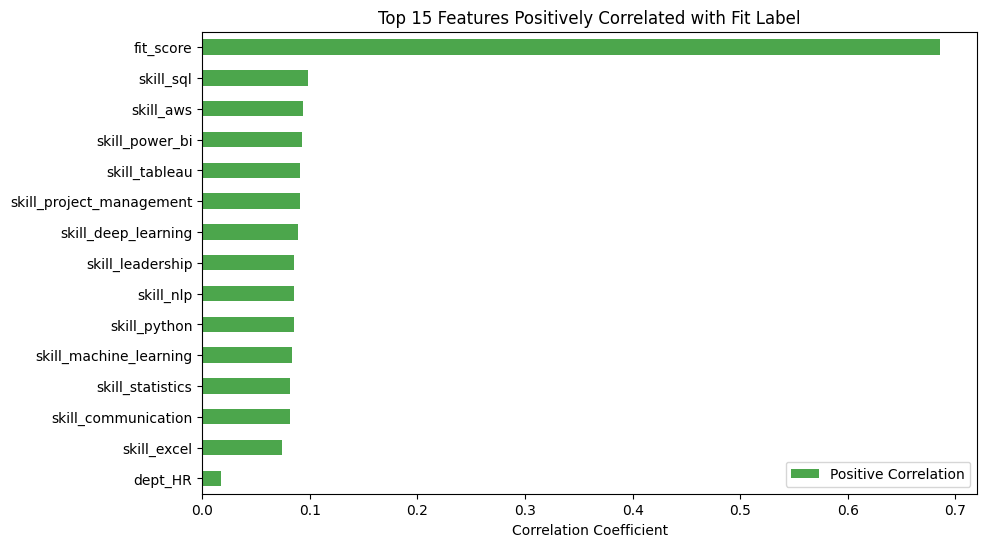

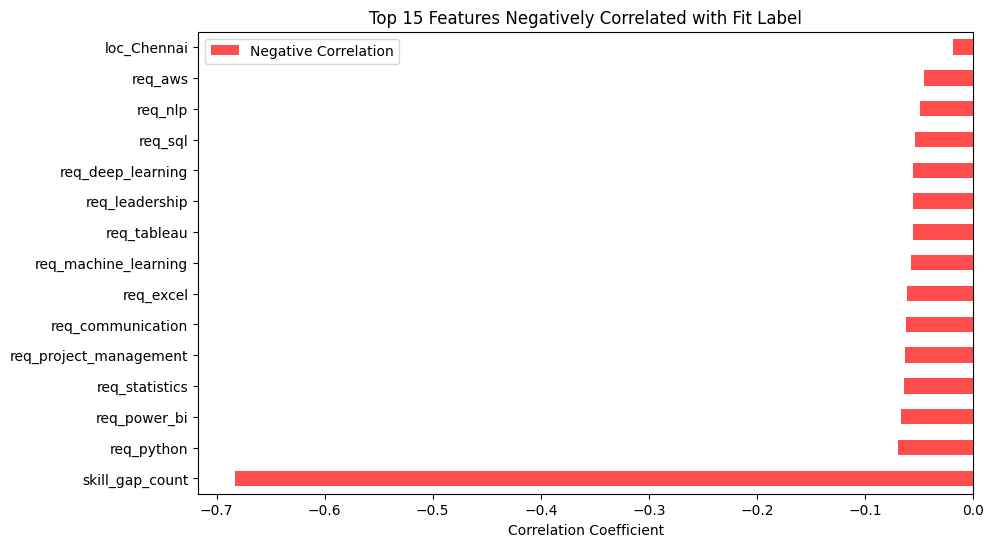

In [76]:
# Plot
plt.figure(figsize=(10, 6))
top_positive.plot(kind='barh', color='green', alpha=0.7, label='Positive Correlation')
plt.gca().invert_yaxis()
plt.title('Top 15 Features Positively Correlated with Fit Label')
plt.xlabel('Correlation Coefficient')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
top_negative.plot(kind='barh', color='red', alpha=0.7, label='Negative Correlation')
plt.gca().invert_yaxis()
plt.title('Top 15 Features Negatively Correlated with Fit Label')
plt.xlabel('Correlation Coefficient')
plt.legend()
plt.show()

In [77]:
df['education_level'].value_counts()

education_level
0    5073
1    5029
3    4953
2    4945
Name: count, dtype: int64

In [78]:
df.head(2)

,years_of_experience,education_level,skill_gap_count,fit_score,years_in_current_job,past_projects_count,average_project_rating,training_attended,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau,soft_communication,soft_creativity,soft_leadership,soft_teamwork,soft_time_management,req_aws,req_communication,req_deep_learning,req_excel,req_leadership,req_machine_learning,req_nlp,req_power_bi,req_project_management,req_python,req_sql,req_statistics,req_tableau,job_Data_Analyst,job_HR_Analyst,job_Marketing_Analyst,job_Project_Manager,job_Software_Engineer,dept_Finance,dept_HR,dept_IT,dept_Marketing,dept_Operations,loc_Bangalore,loc_Chennai,loc_Delhi,loc_Hyderabad,loc_Mumbai
0,3,0,2,50,10,17,2.7,3,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,8,0,2,33,0,14,3.1,3,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


# Distributions and Outliers for numerical

In [80]:
df['past_projects_count'] = df['past_projects_count'].astype(int)

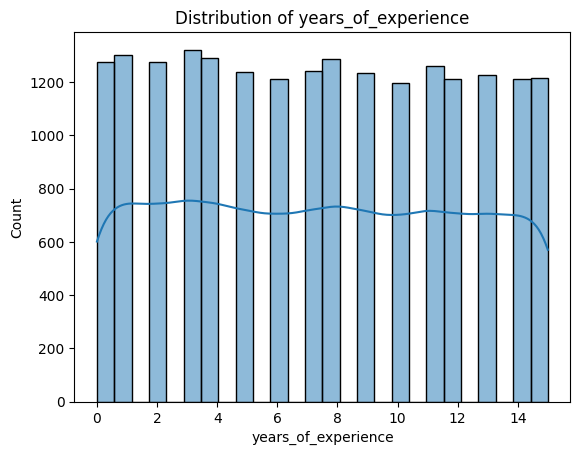

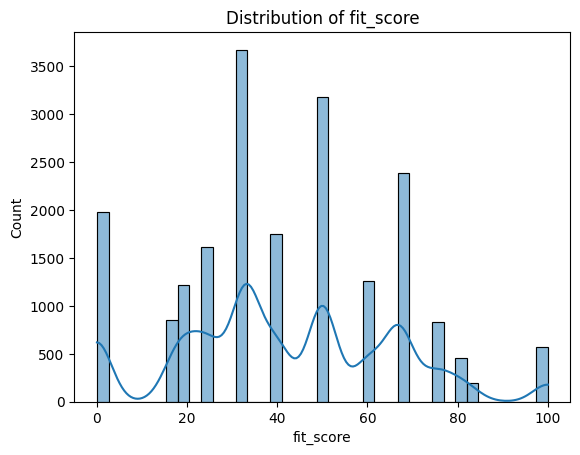

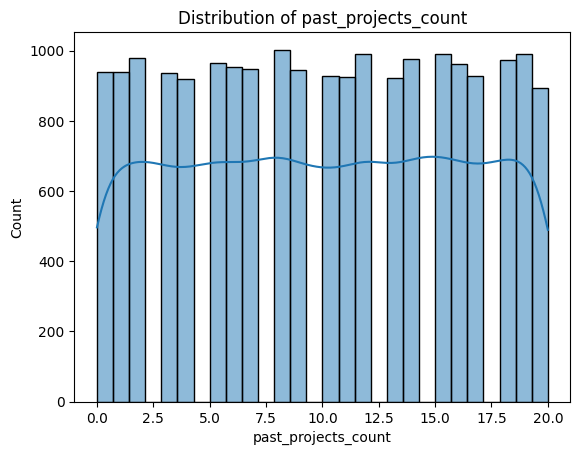

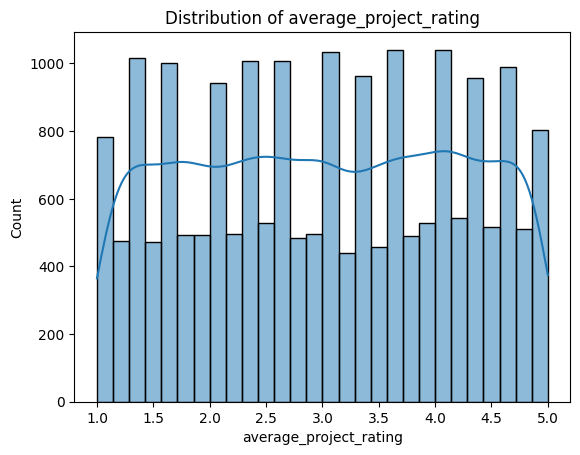

In [81]:
num_cols = ['years_of_experience', 'fit_score', 'past_projects_count', 'average_project_rating']
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

In [82]:
df['past_projects_count']

0        17
1        14
2        20
3        20
4         8
         ..
19995    17
19996    19
19997     2
19998    17
19999    18
Name: past_projects_count, Length: 20000, dtype: int32

# Checking Ouliers

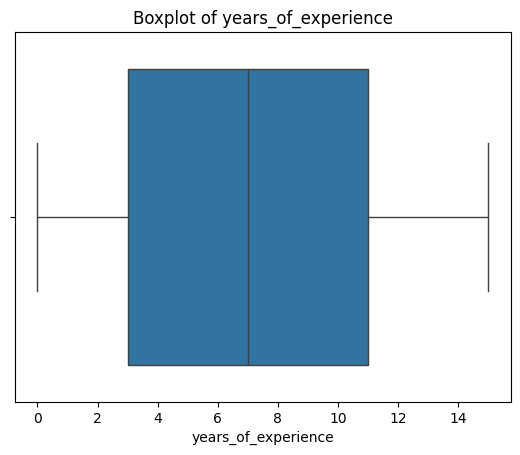

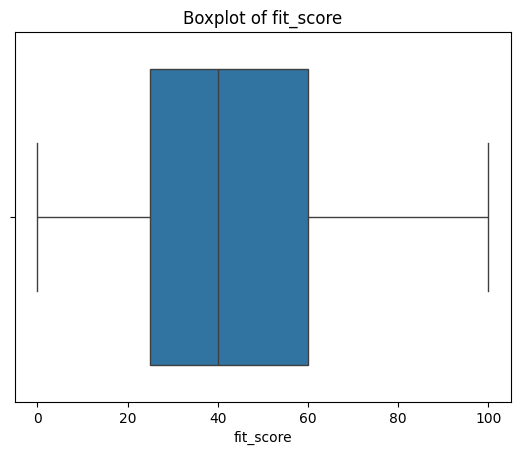

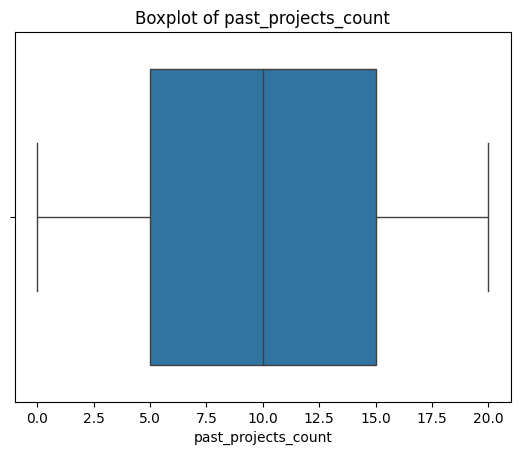

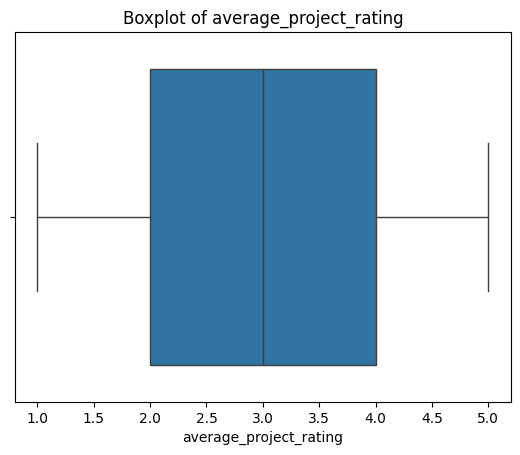

In [84]:
num_cols = ['years_of_experience', 'fit_score', 'past_projects_count', 'average_project_rating']
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

In [85]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} has {len(outliers)} outliers")

years_of_experience has 0 outliers
fit_score has 0 outliers
past_projects_count has 0 outliers
average_project_rating has 0 outliers


In [86]:
df.head(2)

,years_of_experience,education_level,skill_gap_count,fit_score,years_in_current_job,past_projects_count,average_project_rating,training_attended,fit_label,cert_aws,cert_pmp,cert_power_bi,cert_python,cert_tableau,skill_aws,skill_communication,skill_deep_learning,skill_excel,skill_leadership,skill_machine_learning,skill_nlp,skill_power_bi,skill_project_management,skill_python,skill_sql,skill_statistics,skill_tableau,soft_communication,soft_creativity,soft_leadership,soft_teamwork,soft_time_management,req_aws,req_communication,req_deep_learning,req_excel,req_leadership,req_machine_learning,req_nlp,req_power_bi,req_project_management,req_python,req_sql,req_statistics,req_tableau,job_Data_Analyst,job_HR_Analyst,job_Marketing_Analyst,job_Project_Manager,job_Software_Engineer,dept_Finance,dept_HR,dept_IT,dept_Marketing,dept_Operations,loc_Bangalore,loc_Chennai,loc_Delhi,loc_Hyderabad,loc_Mumbai
0,3,0,2,50,10,17,2.7,3,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,8,0,2,33,0,14,3.1,3,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [87]:
df['fit_label'].value_counts()

fit_label
0    16354
1     3646
Name: count, dtype: int64

In [88]:
corr = df.corr()['fit_label'].sort_values(ascending=False)
print(corr)

fit_label                   1.000000
fit_score                   0.685962
skill_sql                   0.098076
skill_aws                   0.093462
skill_power_bi              0.093162
skill_tableau               0.091091
skill_project_management    0.091067
skill_deep_learning         0.089259
skill_leadership            0.085437
skill_nlp                   0.085079
skill_python                0.084912
skill_machine_learning      0.083459
skill_statistics            0.081682
skill_communication         0.081452
skill_excel                 0.074137
dept_HR                     0.017395
loc_Mumbai                  0.011823
job_Marketing_Analyst       0.011517
soft_leadership             0.011188
cert_pmp                    0.009425
job_Data_Analyst            0.008034
years_in_current_job        0.007132
years_of_experience         0.005857
soft_teamwork               0.005476
loc_Hyderabad               0.005168
cert_power_bi               0.004825
job_Project_Manager         0.004050
s

# Feature Engineering

In [90]:
#  Drop leakage features
leak_features = ['fit_score', 'skill_gap_count']
X = df.drop(columns=leak_features + ['fit_label'])
y = df['fit_label']

In [91]:
#  Train-test split with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [92]:
#  Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Original training set
print("Original training set class distribution:", Counter(y_train))

# After SMOTE
print("After SMOTE class distribution:", Counter(y_train_res))


Original training set class distribution: Counter({0: 13083, 1: 2917})
After SMOTE class distribution: Counter({1: 13083, 0: 13083})


# Model Building and Evaluation

In [94]:
#  Train Random Forest with class_weight
clf = RandomForestClassifier( n_estimators=120,
    max_depth=8,
    min_samples_leaf=9,
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=9,
                       n_estimators=120, random_state=42)

In [95]:
#  Predict and evaluate
y_pred = clf.predict(X_test)

print("Training Accuracy:", clf.score(X_train_res, y_train_res))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.9208132691278759
Testing Accuracy: 0.8585
Confusion Matrix:
 [[3165  106]
 [ 460  269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      3271
           1       0.72      0.37      0.49       729

    accuracy                           0.86      4000
   macro avg       0.80      0.67      0.70      4000
weighted avg       0.84      0.86      0.84      4000



In [96]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=len(y_train_res[y_train_res==0])/len(y_train_res[y_train_res==1]),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train_res, y_train_res)


C:\Users\VimalKumar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:28:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [97]:
y_pred = xgb.predict(X_test)

print("Training Accuracy:", xgb.score(X_train_res, y_train_res))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.9999235649315906
Testing Accuracy: 0.9905
Confusion Matrix:
 [[3267    4]
 [  34  695]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3271
           1       0.99      0.95      0.97       729

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.98      4000
weighted avg       0.99      0.99      0.99      4000



# Import Features check 

                   Feature  Importance
40          req_statistics    0.079179
36            req_power_bi    0.076212
38              req_python    0.072634
34    req_machine_learning    0.064188
33          req_leadership    0.063141
30       req_communication    0.060049
29                 req_aws    0.057554
39                 req_sql    0.053569
41             req_tableau    0.051622
37  req_project_management    0.047804
35                 req_nlp    0.044352
31       req_deep_learning    0.042478
32               req_excel    0.041190
18          skill_power_bi    0.011810
22        skill_statistics    0.010649


C:\Users\VimalKumar\AppData\Local\Temp\ipykernel_9348\2804032687.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


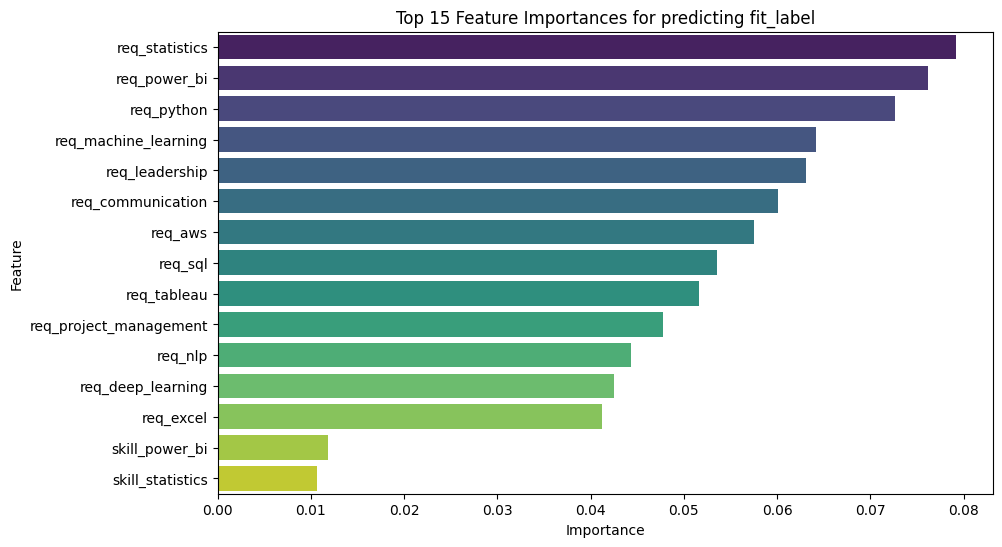

In [99]:
#  feature importances from the trained Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': clf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Show top 15 features
top_features = feature_importances.head(15)
print(top_features)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 15 Feature Importances for predicting fit_label')
plt.show()

# Conclusion

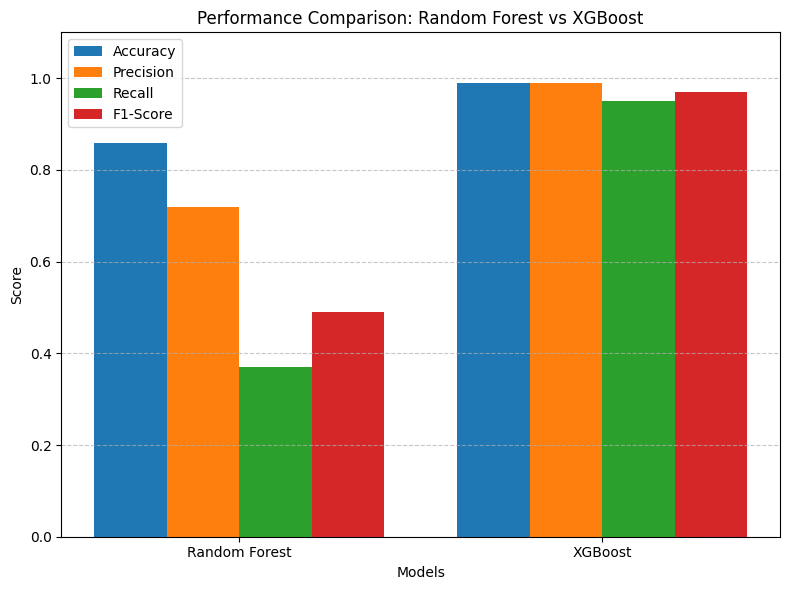

In [101]:
# Metrics
models = ['Random Forest', 'XGBoost']
accuracy = [0.8585, 0.9905]
precision = [0.72, 0.99]
recall = [0.37, 0.95]
f1 = [0.49, 0.97]

# Bar chart setup
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(8, 6))
plt.bar(x - width*1.5, accuracy, width, label='Accuracy')
plt.bar(x - width/2, precision, width, label='Precision')
plt.bar(x + width/2, recall, width, label='Recall')
plt.bar(x + width*1.5, f1, width, label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison: Random Forest vs XGBoost')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [102]:
import joblib

# Saving the XGBoost model
joblib.dump(xgb, "fit_label_model.pkl")

['fit_label_model.pkl']

In [103]:
import joblib

# Saving the trained Random Forest model
joblib.dump(clf, "random_forest_model.pkl")

['random_forest_model.pkl']